In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as nm
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=250
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("/content/Universities.csv")
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [18]:
#drop columns
x =df.drop(columns=["Univ"])
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


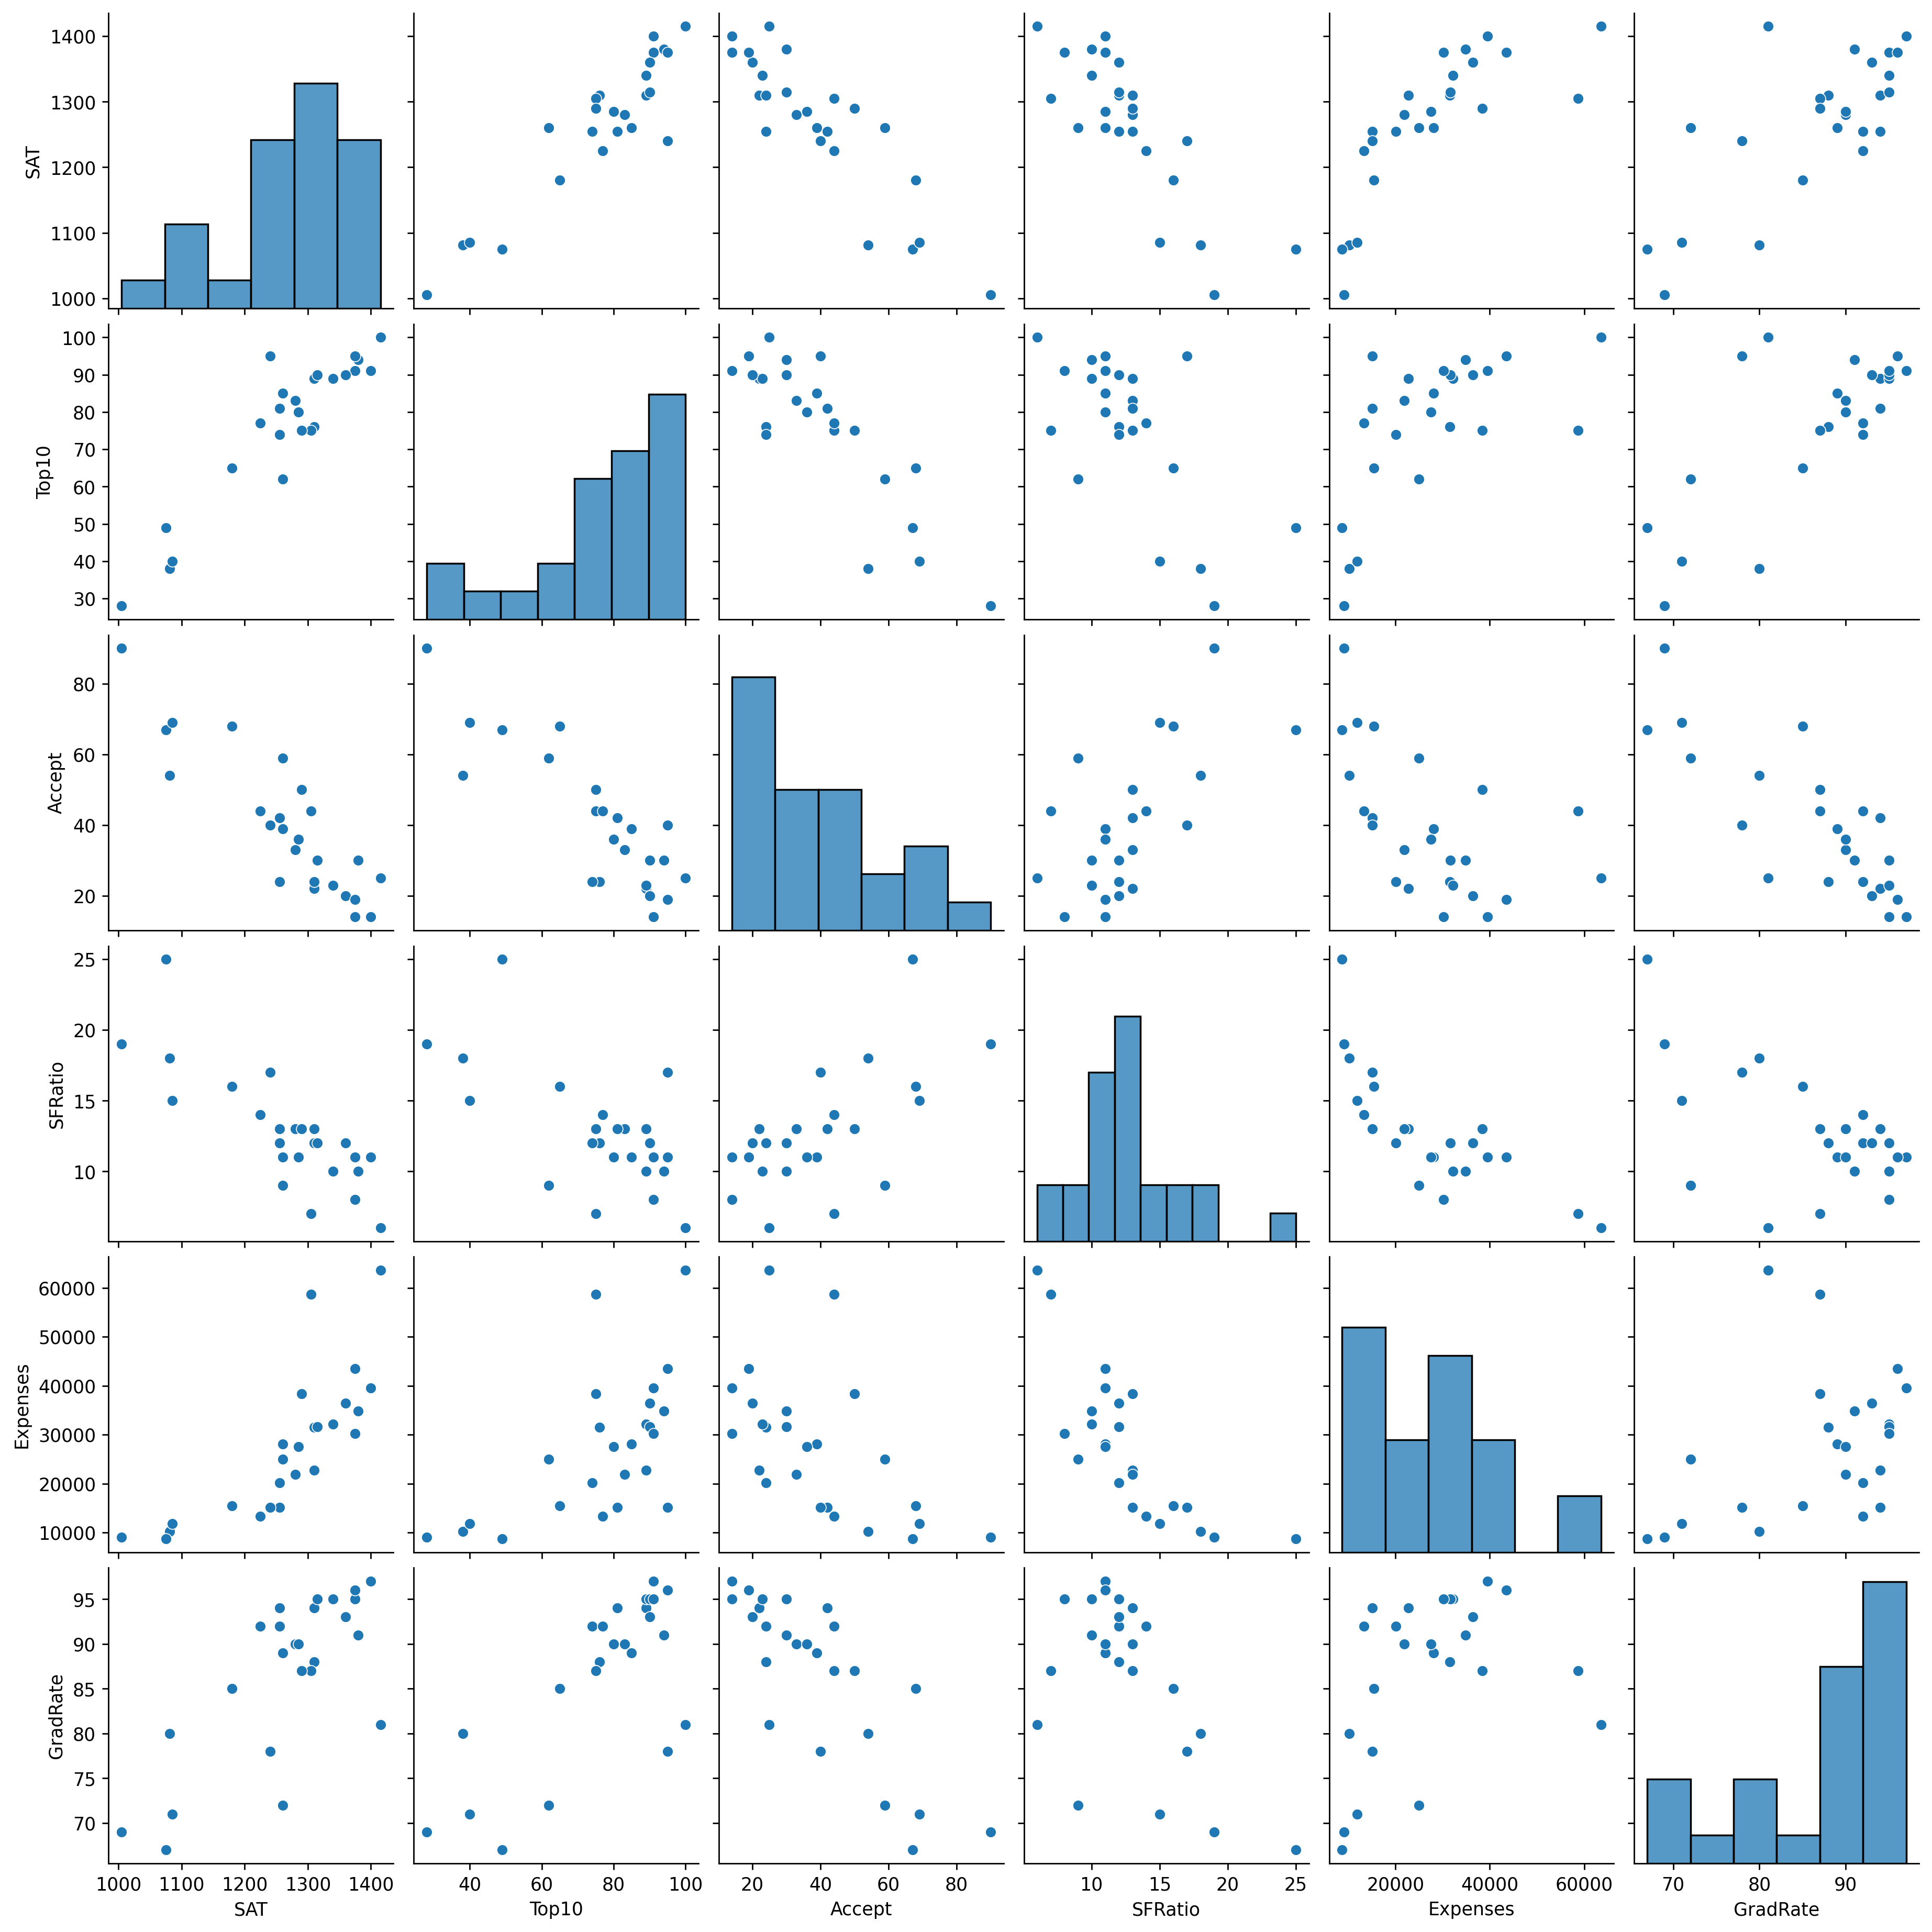

In [19]:
sns.pairplot(x)

# Feature ***Scaling*** 

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [24]:
from scipy.cluster import hierarchy

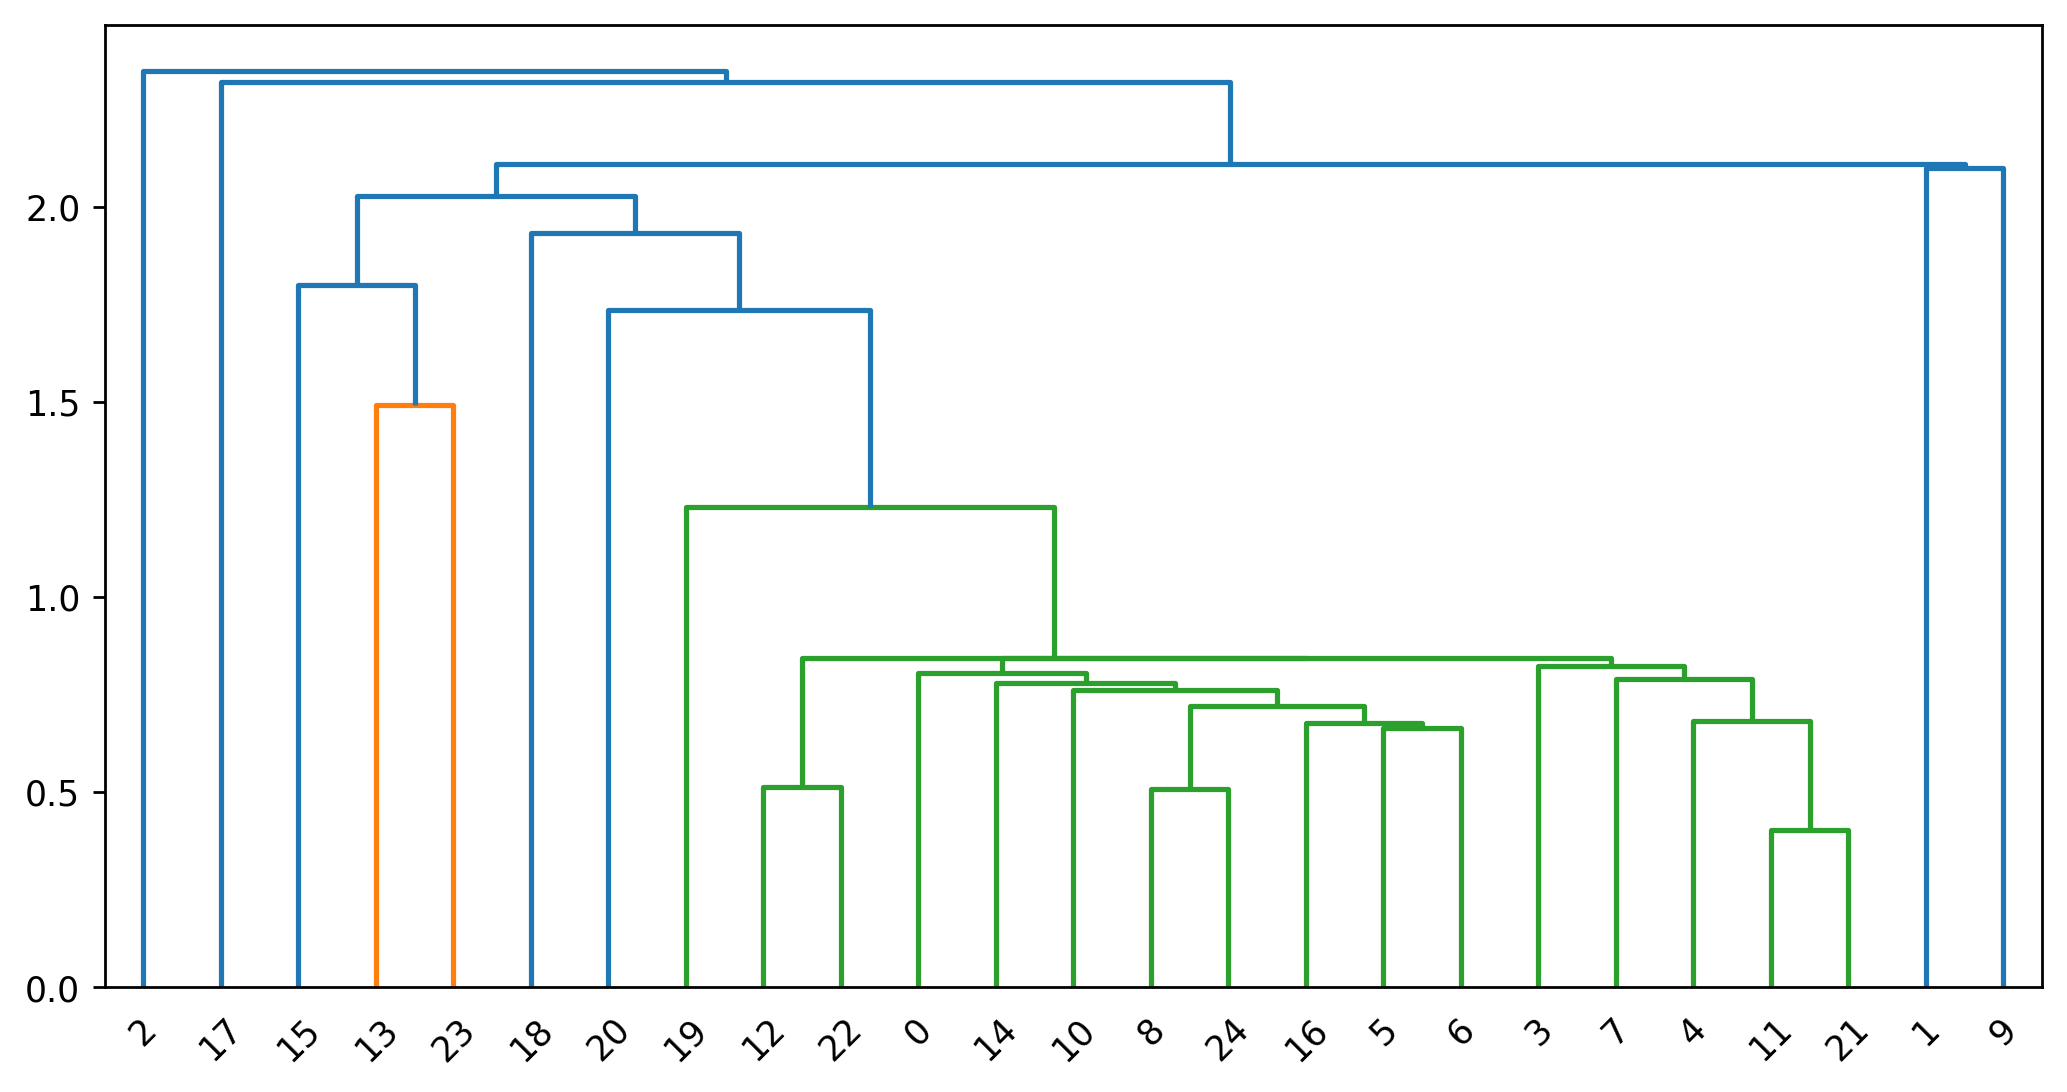

In [25]:
lk = hierarchy.linkage(x,method="single")
dendogram = hierarchy.dendrogram(lk)

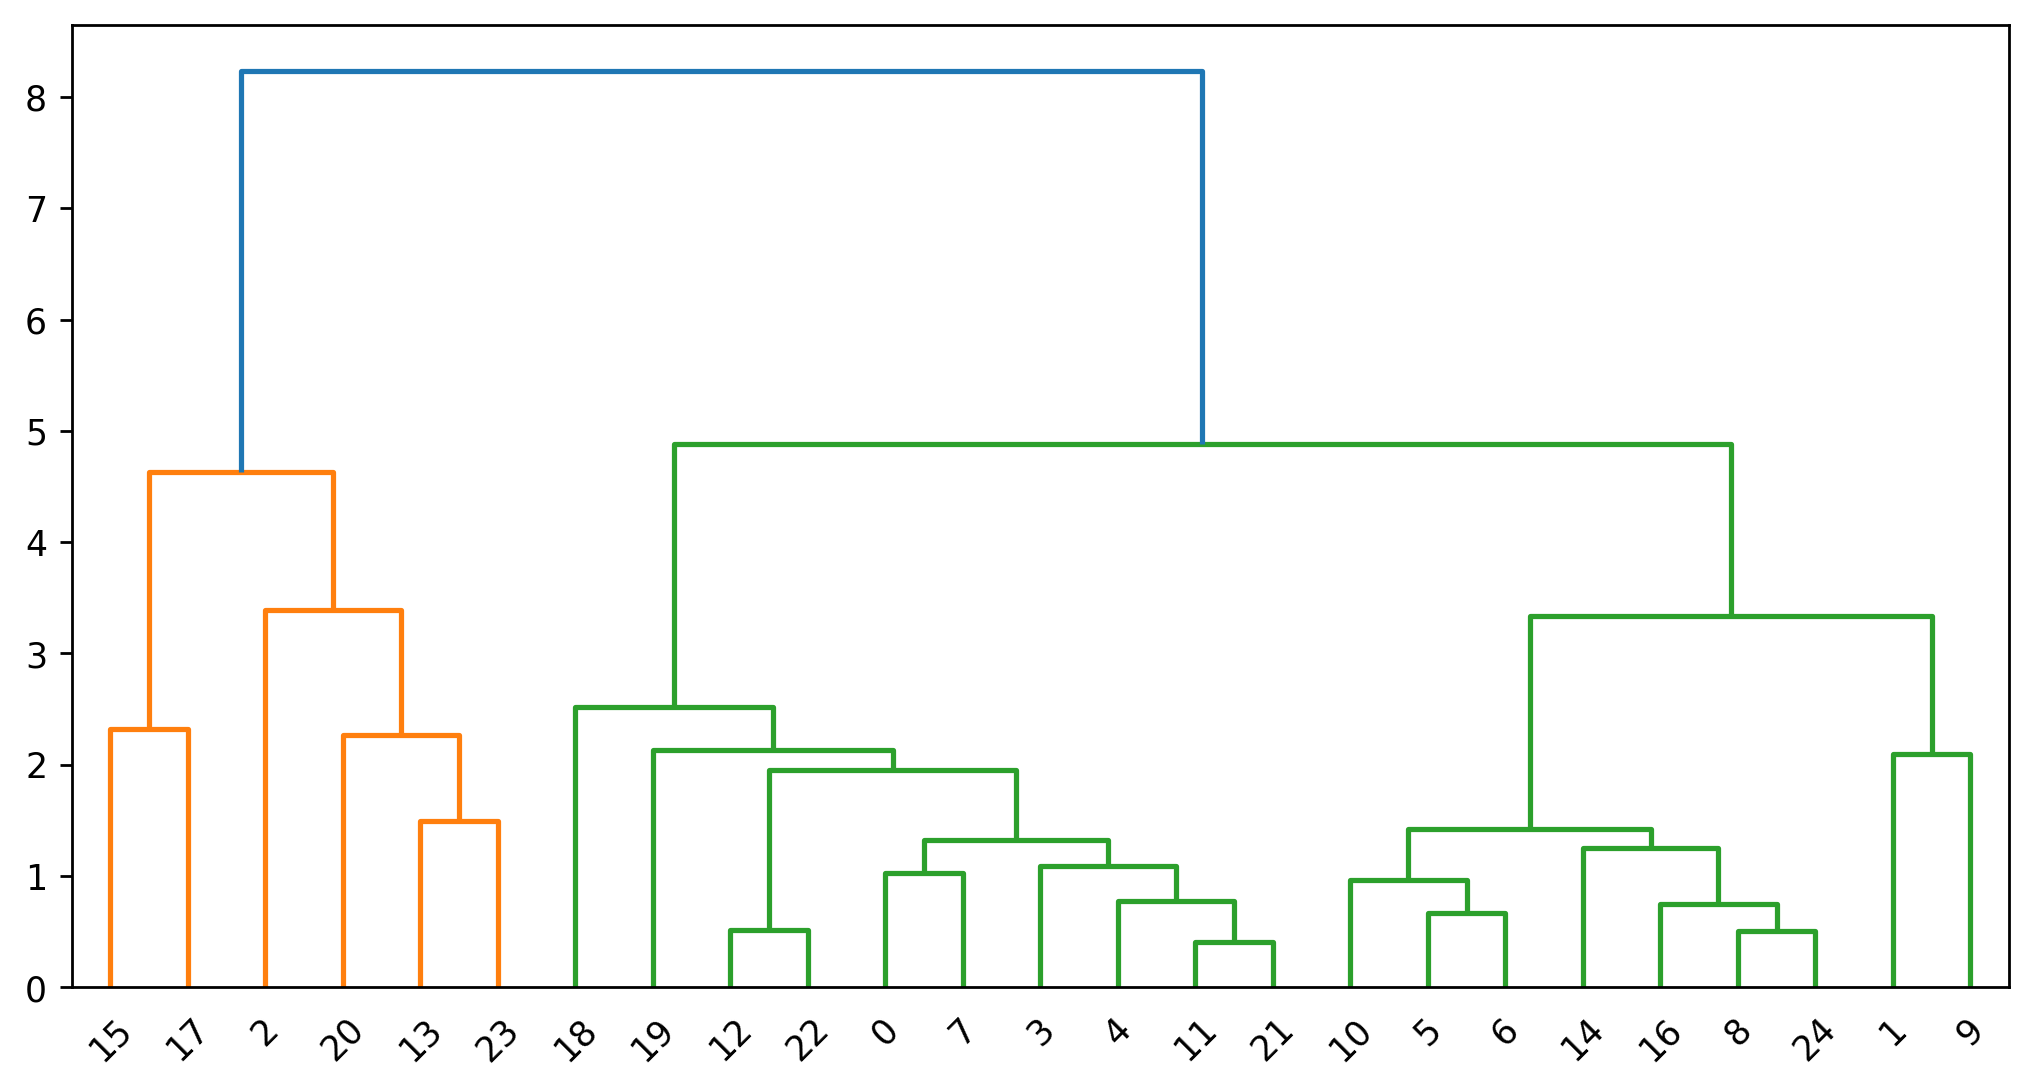

In [26]:
lk = hierarchy.linkage(x,method="complete")
dendogram = hierarchy.dendrogram(lk)

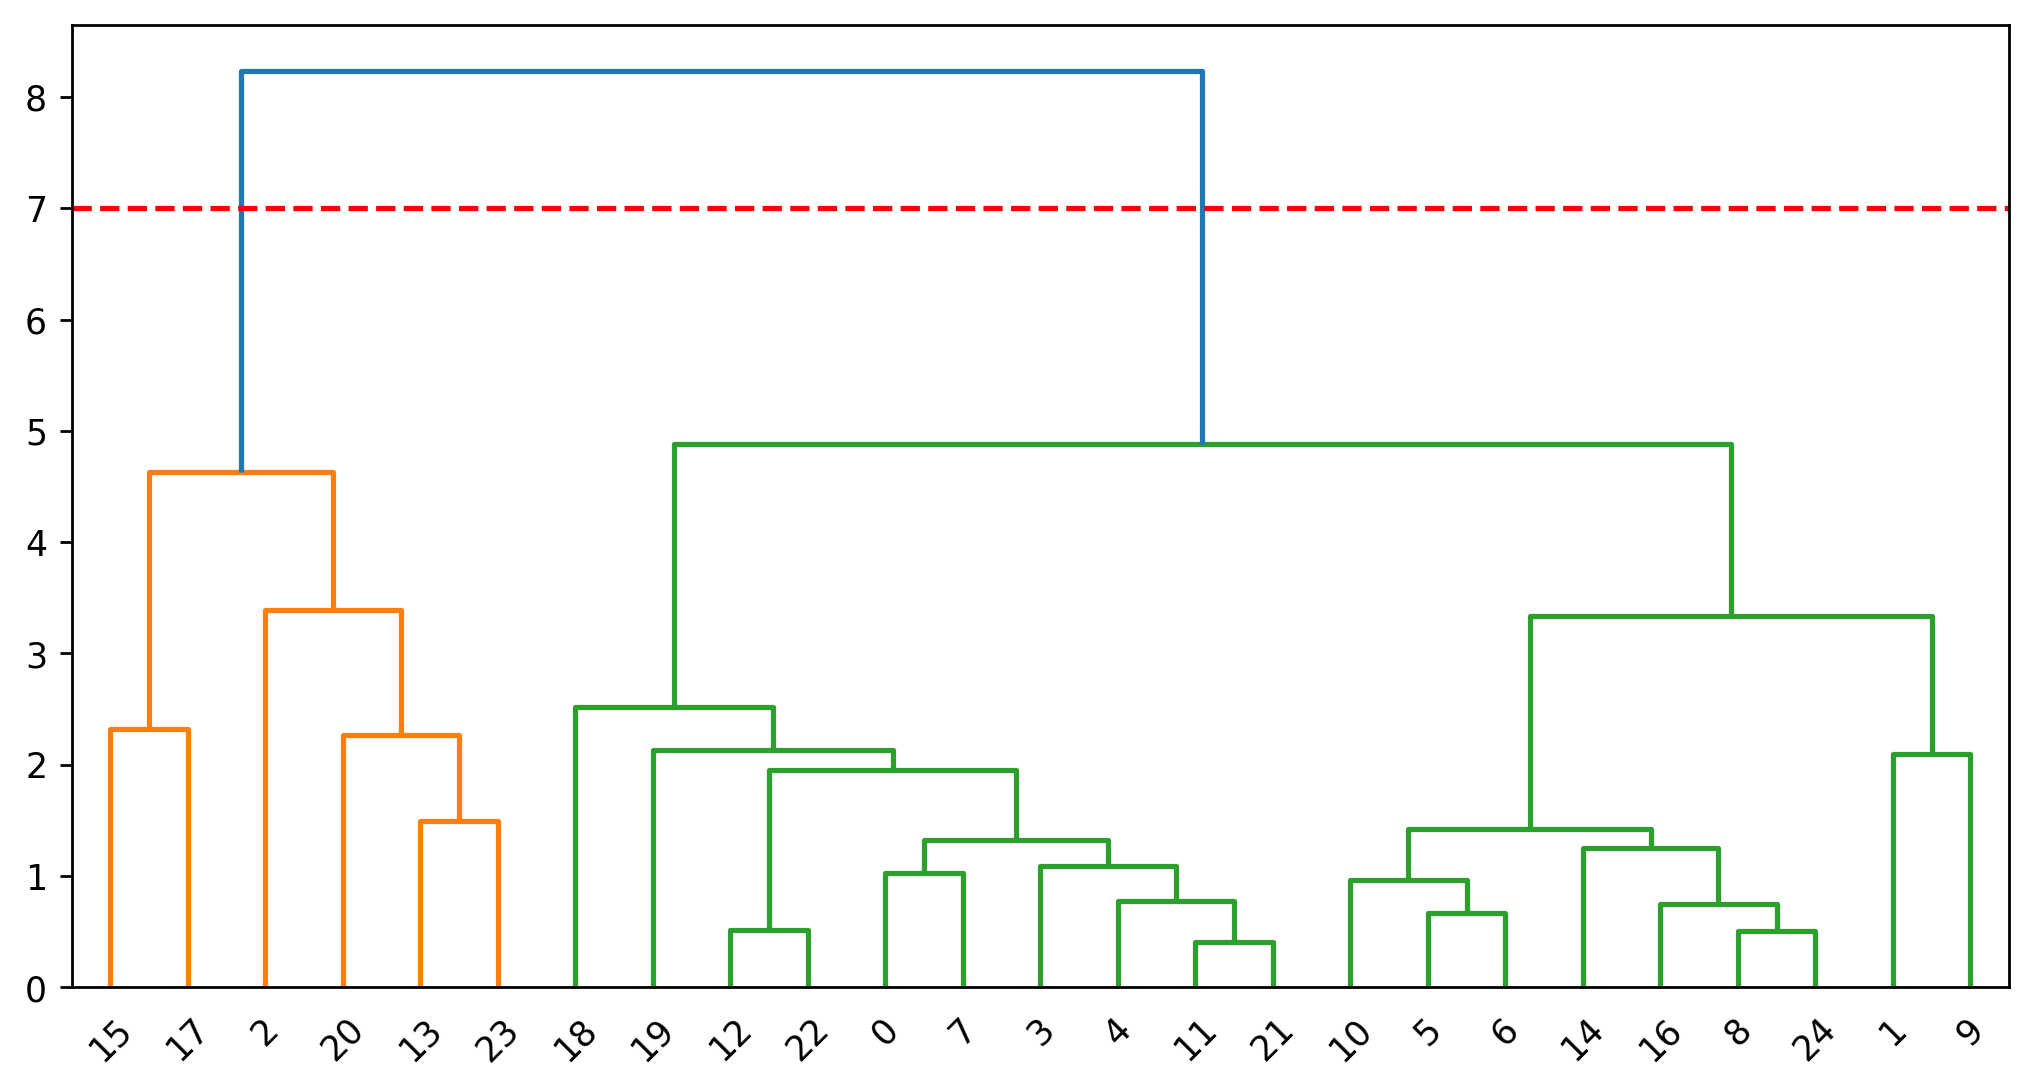

In [27]:
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7 , c = 'red', linestyle = '--')

# ***Model Building***

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hc = AgglomerativeClustering(n_clusters=2)

In [30]:
y=hc.fit_predict(x)

In [31]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

In [33]:
df["cluster"]=y

In [34]:
df.groupby("cluster").agg("mean")

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1305.47619,83.666667,33.333333,11.47619,30708.952381,89.571429
1,1061.50000,38.750000,70.000000,19.25000,9953.000000,71.750000


In [42]:
df[df["cluster"]==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,Cluster
13,PennState,1081,38,54,18,10185,80,1,1
15,Purdue,1005,28,90,19,9066,69,1,1
17,TexasA&M,1075,49,67,25,8704,67,1,1
23,UWisconsin,1085,40,69,15,11857,71,1,1


In [43]:
df[df["cluster"]==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,Cluster
0,Brown,1310,89,22,13,22704,94,0,0
1,CalTech,1415,100,25,6,63575,81,0,0
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,0,0
4,Cornell,1280,83,33,13,21864,90,0,0
5,Dartmouth,1340,89,23,10,32162,95,0,0
6,Duke,1315,90,30,12,31585,95,0,0
7,Georgetown,1255,74,24,12,20126,92,0,0
8,Harvard,1400,91,14,11,39525,97,0,0
9,JohnsHopkins,1305,75,44,7,58691,87,0,0


# ***4 cluster***

In [44]:
data =pd.DataFrame(x)

In [45]:
data.head()

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


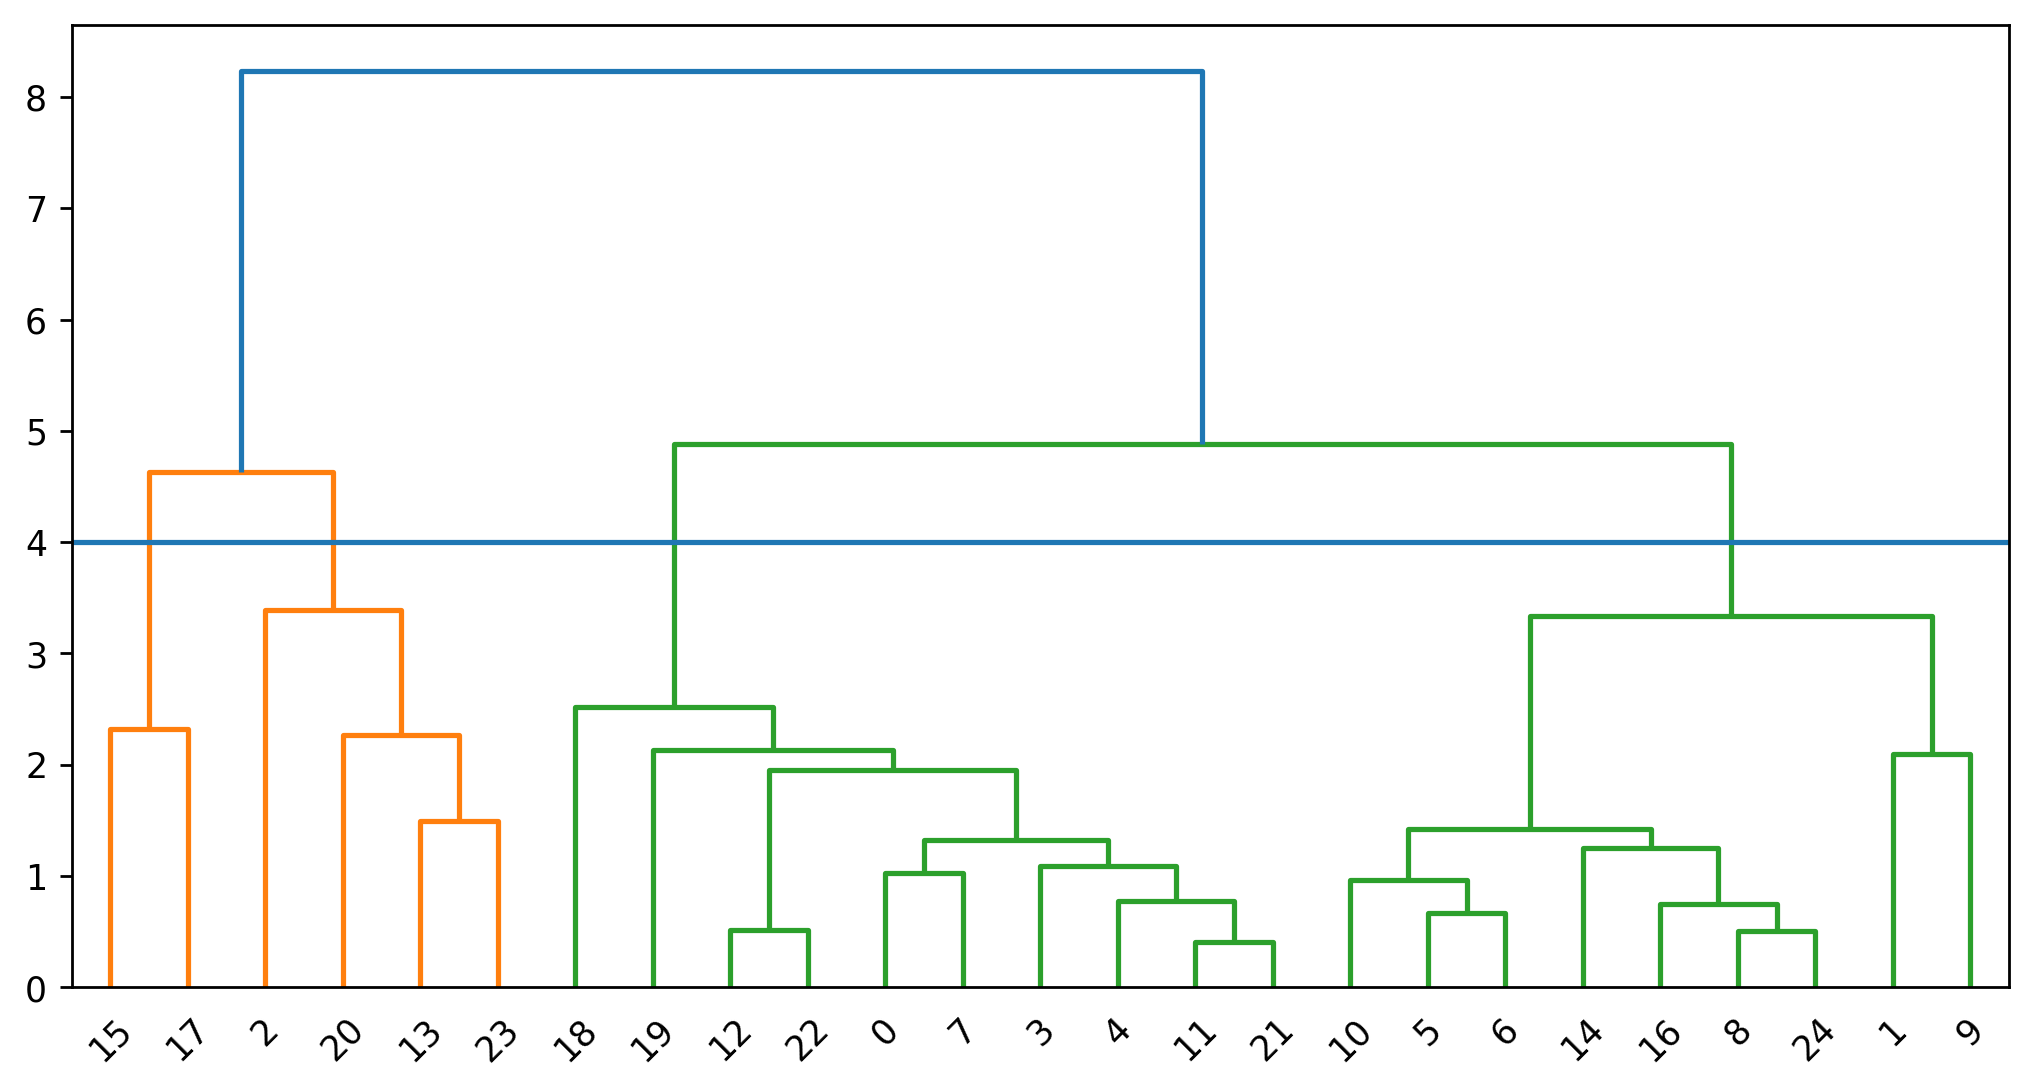

In [46]:
lk = hierarchy.linkage(data, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 4)

In [47]:
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(data)
y

array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3])

In [48]:
df["y"]=y

In [49]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,Cluster,y
0,Brown,1310,89,22,13,22704,94,0,0,0
1,CalTech,1415,100,25,6,63575,81,0,0,2
2,CMU,1260,62,59,9,25026,72,0,0,0
3,Columbia,1310,76,24,12,31510,88,0,0,0
4,Cornell,1280,83,33,13,21864,90,0,0,0
5,Dartmouth,1340,89,23,10,32162,95,0,0,3
6,Duke,1315,90,30,12,31585,95,0,0,3
7,Georgetown,1255,74,24,12,20126,92,0,0,0
8,Harvard,1400,91,14,11,39525,97,0,0,3
9,JohnsHopkins,1305,75,44,7,58691,87,0,0,2


In [50]:
df.groupby("y").agg("mean")

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,Cluster
y,,,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333,0.0,0.0
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000,1.0,1.0
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000,0.0,0.0
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429,0.0,0.0


# ***IN CLASS Exercise***

# ***Create Logistic regression model.***
Steps:
1) Define x and y
2) Split the data into training and testing
3) Build model
4) Get prediction
5) Evaluate 

In [52]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,Cluster,y
0,Brown,1310,89,22,13,22704,94,0,0,0
1,CalTech,1415,100,25,6,63575,81,0,0,2
2,CMU,1260,62,59,9,25026,72,0,0,0
3,Columbia,1310,76,24,12,31510,88,0,0,0
4,Cornell,1280,83,33,13,21864,90,0,0,0
5,Dartmouth,1340,89,23,10,32162,95,0,0,3
6,Duke,1315,90,30,12,31585,95,0,0,3
7,Georgetown,1255,74,24,12,20126,92,0,0,0
8,Harvard,1400,91,14,11,39525,97,0,0,3
9,JohnsHopkins,1305,75,44,7,58691,87,0,0,2


In [53]:
df.drop(columns=["y"],inplace=True)

In [54]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,Cluster
0,Brown,1310,89,22,13,22704,94,0,0
1,CalTech,1415,100,25,6,63575,81,0,0
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,0,0
4,Cornell,1280,83,33,13,21864,90,0,0
5,Dartmouth,1340,89,23,10,32162,95,0,0
6,Duke,1315,90,30,12,31585,95,0,0
7,Georgetown,1255,74,24,12,20126,92,0,0
8,Harvard,1400,91,14,11,39525,97,0,0
9,JohnsHopkins,1305,75,44,7,58691,87,0,0


In [56]:
y =df["cluster"]
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    1
24    0
Name: cluster, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [64]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(xtrain,ytrain)

prediction = lg.predict(xtest)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

